## Training Your Model, and Using It to Clean Your Data

In [1]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [2]:
path = Path('data/vwGolfsBingCombined2Split')

In [3]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter(),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [4]:
dls = cars.dataloaders(path)

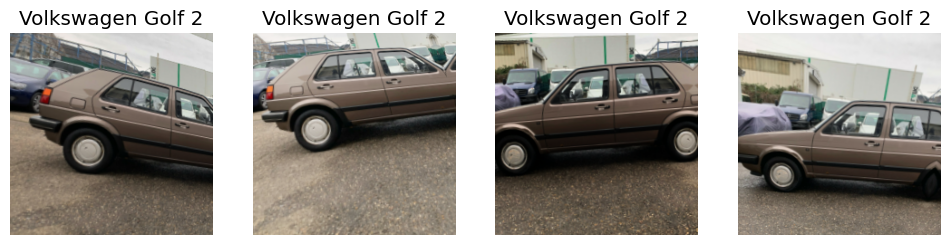

In [5]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
learn = vision_learner(dls, models.resnet50, metrics=accuracy)
epochs = 200
learn.fine_tune(epochs) # should be 100 for best accuracy

/home/ec2-user/SageMaker/.env/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/ec2-user/SageMaker/.env/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/ec2-user/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,2.559145,1.335308,0.571930,00:28


epoch,train_loss,valid_loss,accuracy,time
0,1.287773,1.001431,0.663158,00:34
1,1.098346,0.862672,0.712281,00:35
2,0.936727,0.741597,0.740351,00:35
3,0.799458,0.668285,0.771930,00:35
4,0.669843,0.620981,0.778947,00:34
5,0.574655,0.571065,0.796491,00:34
6,0.503375,0.528937,0.817544,00:35
7,0.421204,0.489805,0.842105,00:35
8,0.364011,0.486806,0.842105,00:34
9,0.310046,0.471585,0.842105,00:34


In [ ]:
# learn.recorder.values

In [ ]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

In [ ]:
# interp.plot_top_losses(4, nrows=4)

In [ ]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [ ]:
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

### Export

In [ ]:
learn.export()

In [ ]:
exportPath = Path()
exportPath.ls(file_exts='.pkl')

(#2) [Path('export.pkl'),Path('golfR50F100A0897.pkl')]

In [ ]:
learn_inf = load_learner(exportPath/'export.pkl')

In [ ]:
testImgFilePath = path/'own/Volkswagen Golf 4/Golf_4_4.jpeg'

In [ ]:
learn_inf.predict(testImgFilePath)

('Volkswagen Golf 4',
 TensorBase(3),
 TensorBase([4.7262e-10, 2.7225e-11, 2.1218e-09, 1.0000e+00, 1.9639e-10, 1.2286e-12, 2.5262e-10, 1.4100e-09]))

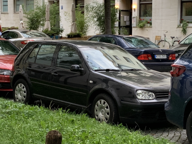

In [ ]:
testImg = PILImage.create(testImgFilePath)
testImg.to_thumb(192)

### Test set

In [ ]:
from os.path import join

testFolderPath = join(path, 'test')
testFolderPath

'data/vwGolfsBingCombined2Split/test'

In [ ]:
testImageFiles = list(get_image_files(testFolderPath))

In [ ]:
testDl = dls.test_dl(test_items=testImageFiles, with_labels=True)

In [ ]:
validFolderPath = join(path, 'valid')
validFolderPath

'data/vwGolfsBingCombined2Split/valid'

In [ ]:
validImageFiles = list(get_image_files(validFolderPath))

In [ ]:
validDl = dls.test_dl(test_items=validImageFiles, with_labels=True)

In [ ]:
ownTestFolderPath = join(path, 'own')
ownTestImageFiles = list(get_image_files(ownTestFolderPath))
ownTestDl = dls.test_dl(test_items=ownTestImageFiles, with_labels=True)

In [ ]:
learn_inf.validate(dl=dls.valid)

(#2) [0.19210204482078552,0.9684210419654846]

In [ ]:
learn_inf.validate(dl=validDl)

(#2) [0.19210204482078552,0.9684210419654846]

In [ ]:
learn_inf.validate(dl=testDl)

(#2) [0.15086740255355835,0.9567307829856873]

In [ ]:
learn_inf.validate(dl=ownTestDl)

(#2) [0.9500051140785217,0.8275862336158752]

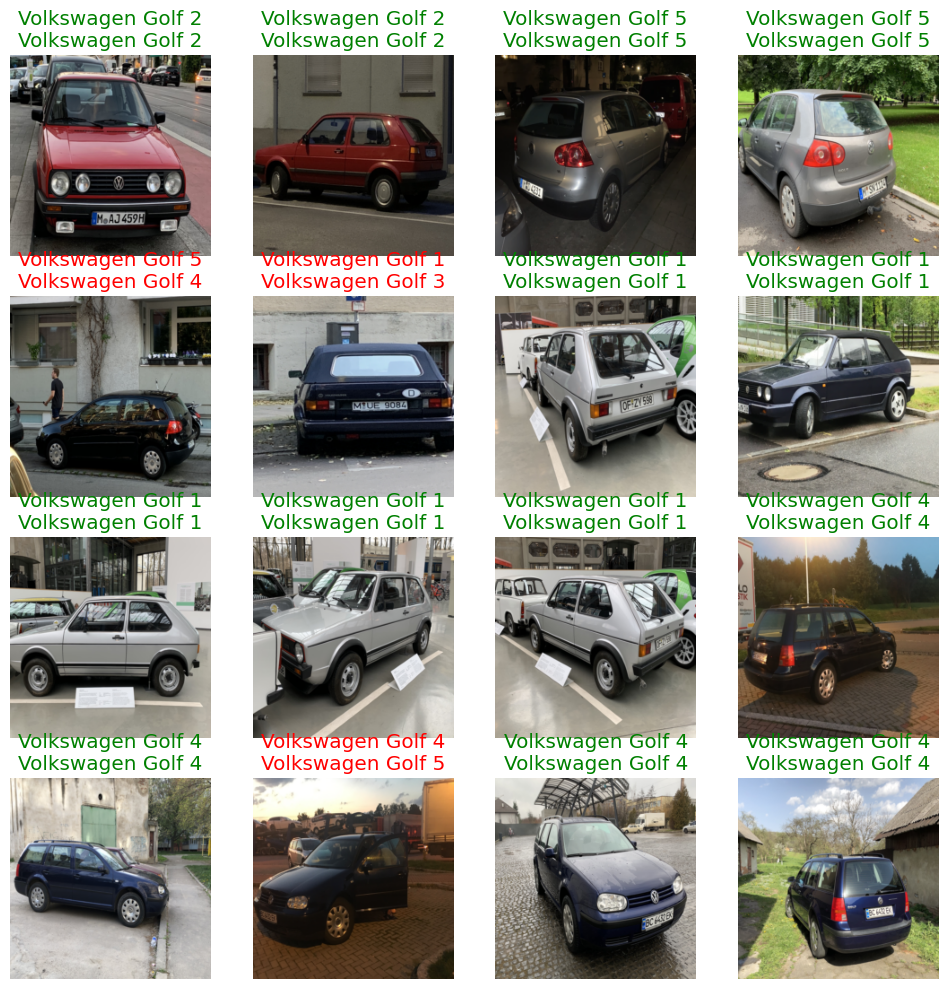

In [ ]:
learn_inf.show_results(dl=ownTestDl, max_n=16)

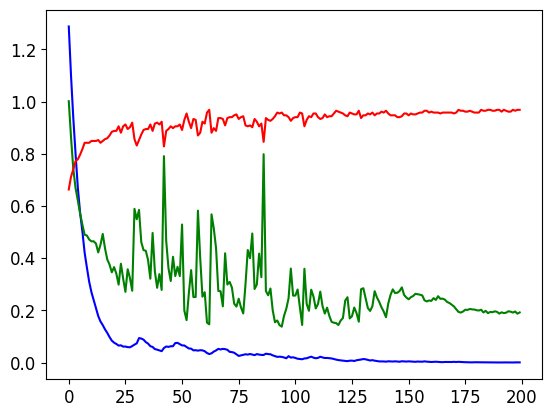

In [ ]:
skip_first = 0
index_slice = slice(skip_first, epochs)
plt.plot(L(learn.recorder.values[index_slice]).itemgot(0), color='b')
plt.plot(L(learn.recorder.values[index_slice]).itemgot(1), color='g')
plt.plot(L(learn.recorder.values[index_slice]).itemgot(2), color='r')